In [10]:
%matplotlib inline

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)


In [13]:
#Read_the_data
train_df=pd.read_csv("Data/train.csv")
test_df=pd.read_csv("Data/test.csv")
df1=train_df.copy()

In [4]:
#y_train=train_df['variety']

In [5]:
#train_df = train_df.drop(columns="variety")

## Data Cleaning

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [7]:
#train_df=df1

In [15]:
train_df.shape

(82657, 12)

In [16]:
train_df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


## Classification based on prices by country

In [55]:
#Newly Added
mx=train_df.iloc[train_df["price"].idxmax(),1]
mn=train_df.iloc[train_df["price"].idxmin(),1]
print("Cheapest wines is sold  in \"{}\" - {:g}.\n".format(mn,min(train_df["price"])))
print("Costliest wines is sold  in \"{}\" - {:g}.\n".format(mx,max(train_df["price"])))

Cheapest wines is sold  in "US" - 4.

Costliest wines is sold  in "France" - 3300.



In [57]:

price_df = train_df.groupby(['country']).mean()[["price"]]
max_price=price_df["price"].idxmax()
min_price=price_df["price"].idxmin()
print("Cheaper wines are sold (On Average) in \"{}\" - {:g}$.\n".format(min_price,min(price_df["price"])))
print("Costlier wines are sold (On Average) in \"{}\" - {:g}$.\n".format(max_price,max(price_df["price"])))

Cheaper wines are sold (On Average) in "Ukraine" - 9.27273$.

Costlier wines are sold (On Average) in "Switzerland" - 107.8$.



In [59]:

rating_df = train_df.groupby(['country']).mean()[["points"]]
max_rate=rating_df["points"].idxmax()
min_rate=rating_df["points"].idxmin()
print("Bad ratings are given (On Average) in \"{}\" - {:g}.\n".format(min_rate,min(rating_df["points"])))
print("Good ratings are given (On Average) in \"{}\" - {:g}.\n".format(max_rate,max(rating_df["points"])))

Bad ratings are given (On Average) in "Peru" - 82.625.

Good ratings are given (On Average) in "England" - 91.4516.



- As compared to 91.4516 in england, "Peru" - 82.625 is less.
- We can deduce that Quality of wine of good in England as compared to Peru

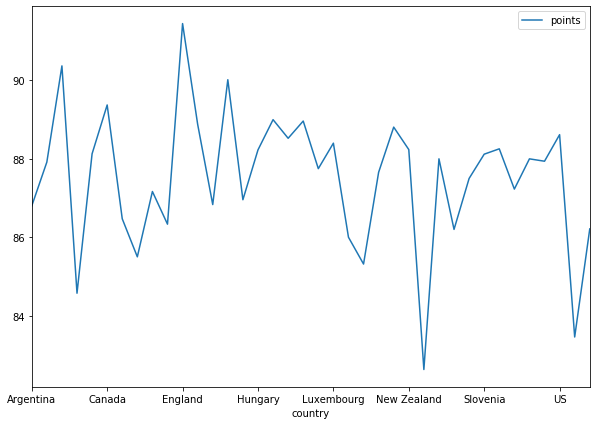

In [67]:
rating_df.plot()

## Plot Country Wise data

In [10]:
wn_country = train_df.groupby(['country']).count()[["province"]].apply(lambda x : 100*x/x.sum())
wn_country.head()

,province
country,
Argentina,3.110552
Australia,1.244221
Austria,2.289947
Brazil,0.033889
Bulgaria,0.112561


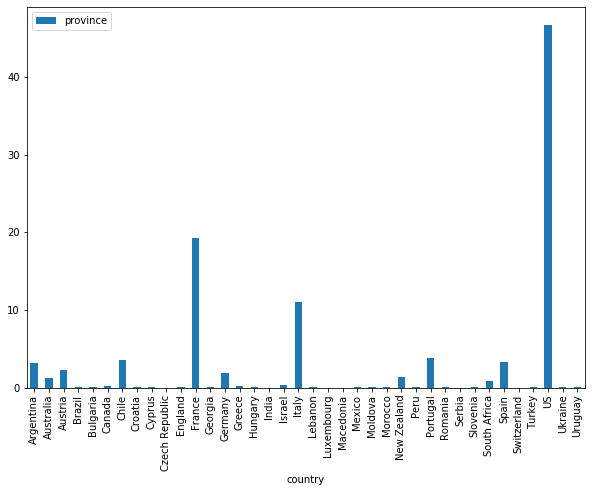

In [11]:
#Plot Normalized Data

wn_country.plot(kind='bar')


## Most Common Winery

In [12]:
#Function to get the most common item
from collections import Counter
def get_most_common_item(df):
    c=Counter(df)
    return c.most_common()

In [13]:
cw=get_most_common_item(train_df["winery"])
print("Most wine trade is from \"{}\" with a count of {}.\n".format(cw[0][0],cw[0][1]))

Most wine trade is from "Testarossa" with a count of 175.



In [14]:
items_by_winery = train_df.groupby(['country'])[['winery']].count().apply(lambda x : 100*x/x.sum())
items_by_winery.head()

,winery
country,
Argentina,3.110552
Australia,1.244221
Austria,2.289947
Brazil,0.033889
Bulgaria,0.112561


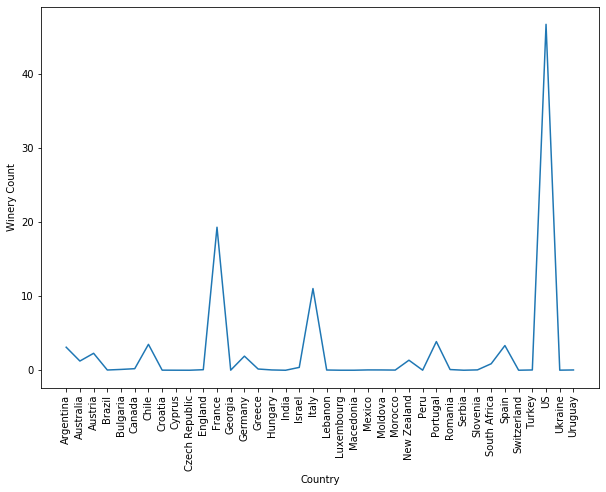

In [15]:
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Winery Count")
plt.plot(items_by_winery)

## Insights
- From the above plot we can say that US has higest number of winerys

In [16]:
vc=get_most_common_item(train_df["variety"])
print("Most wine trade is from \"{}\" with a count of {}.\n".format(vc[0][0],vc[0][1]))

Most wine trade is from "Pinot Noir" with a count of 10587.



In [17]:
items_by_variety = train_df.groupby(['country'])[['variety']].size()
items_by_variety.head()

country
Argentina    2570
Australia    1028
Austria      1892
Brazil         28
Bulgaria       93
dtype: int64

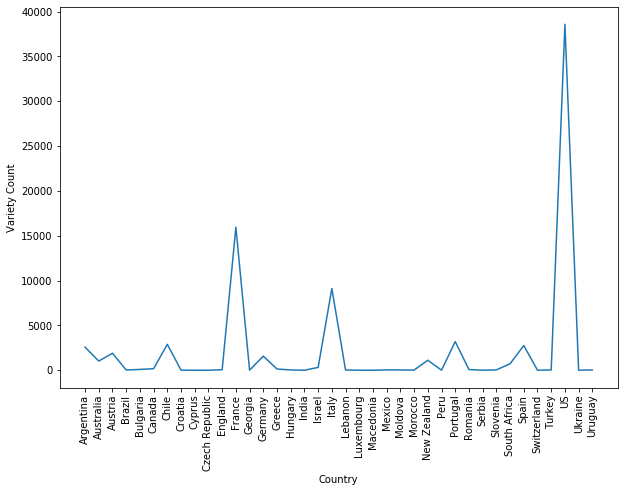

In [18]:
#Plots
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Variety Count")
plt.plot(items_by_variety)

## Insights
- It is sure that the country with highest number of winerys has more number of varieties than others.
- US has large amount of varieties of wines.

## Plot on No of provinces in each country.

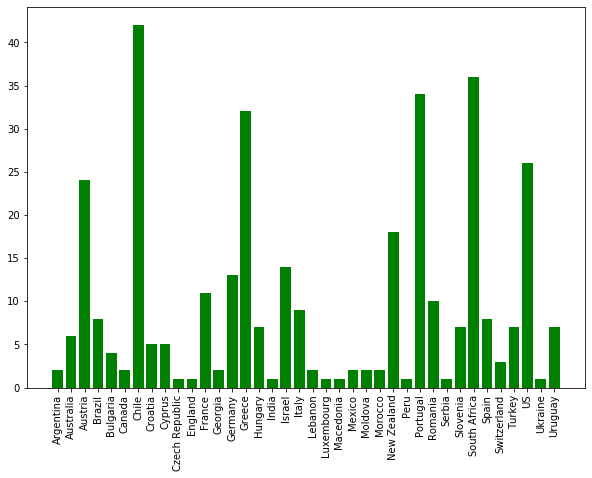

In [19]:

items_by_c=train_df.groupby(['country','province'])['variety'].unique()
tst=items_by_c.index
location_cluster={}
for i in tst:
    if(i[0]) in location_cluster:
        
        location_cluster[i[0]]+=1
    else:
        location_cluster[i[0]]=1
        
plt.bar(location_cluster.keys(), location_cluster.values(), color='g')
plt.xticks(rotation=90)
plt.show()

## No of Varieties classification based on country

In [20]:
items_by_v=train_df.groupby(['country'])['variety'].count()
items_by_v

country
Argentina          2570
Australia          1028
Austria            1892
Brazil               28
Bulgaria             93
Canada              176
Chile              2891
Croatia              12
Cyprus                6
Czech Republic        3
England              62
France            15948
Georgia              12
Germany            1573
Greece              139
Hungary              35
India                 1
Israel              320
Italy              9112
Lebanon              28
Luxembourg            5
Macedonia             5
Mexico               38
Moldova              35
Morocco              21
New Zealand        1121
Peru                  8
Portugal           3197
Romania              80
Serbia                4
Slovenia             42
South Africa        727
Spain              2755
Switzerland           5
Turkey               33
US                38573
Ukraine              11
Uruguay              33
Name: variety, dtype: int64

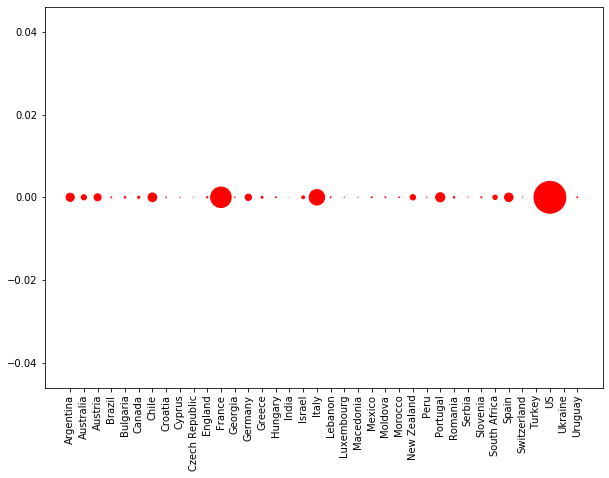

In [21]:
cnt=1
var_cnt=[]
for i in items_by_v.index:
    var_cnt.append(i)
    cnt+=2
x = var_cnt
y = [0]*len(x)
n=len(y)
s = [i/n for i in items_by_v]
plt.scatter(x,y,s=s,color='r')
plt.xticks(rotation=90)
plt.show()

- Plot which shows the total number of varieties by country.
- Larger the size of circle, more no of varieties in that country

## Drop the columns which are not necesssary

In [22]:
train_df.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

In [24]:
def drop_cols(df,cols):
    return df.drop(columns=cols)

In [25]:
#Remove the Unnecessary data_columns
cleaned_df=drop_cols(train_df,["designation","review_title","user_name","region_2","country","region_1","province"])

## Dealing with null values

In [26]:
cleaned_df.isnull().sum()

review_description       0
points                   0
price                 5569
winery                   0
variety                  0
dtype: int64

- As we have null values in price columnwe impute that particluar column

In [27]:
from sklearn.impute import SimpleImputer
def impute(df):
    x=df.values
    x=x.reshape(-1,1)
    imp=SimpleImputer(strategy='mean')
    imp.fit(x)
    return (imp.transform(x))

In [28]:
price1=impute(cleaned_df['price'])
cleaned_df=drop_cols(cleaned_df,["price"])
cleaned_df['price']=price1

In [29]:
cleaned_df.isnull().sum()

review_description    0
points                0
winery                0
variety               0
price                 0
dtype: int64

In [30]:
#cleaned_df.to_pickle('cleaned.pkl')

## Review Description
- we apply sentiment analysis to the reviews.
- we take the polarity value and replace with text.

In [31]:
#cleaned_df=pd.read_pickle('cleaned.pkl')

#

In [32]:
# Apply a first round of text cleaning techniques
import re
import string
#make All text to lowecase,remove numericals


def clean_review(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [33]:
from textblob import TextBlob


In [34]:

def text_processing(cleaned_df):
    #Apply Clean review function
    review=cleaned_df['review_description'].apply(clean_review)
    #cleaned_df=drop_cols(cleaned_df,'review_description')
    pol = lambda x: TextBlob(x).sentiment.polarity 
    cleaned_df['review_description']=cleaned_df['review_description'].apply(pol)
    scale=lambda x: x*100
    cleaned_df['review_description']=cleaned_df['review_description'].apply(scale)
    return cleaned_df
    

In [35]:
df_text=text_processing(cleaned_df)
df_text.head()

,review_description,points,winery,variety,price
0,10.833333,83,Andrew Peace,Chardonnay,10.0
1,-5.833333,89,North by Northwest,Red Blend,15.0
2,-20.416667,94,Renato Ratti,Nebbiolo,80.0
3,41.666667,87,Domaine l'Ancienne Cure,Bordeaux-style White Blend,22.0
4,26.547619,88,Château du Cèdre,Malbec,33.0


In [36]:
df_text.to_pickle('txt_df.pkl')

In [37]:
df_text=pd.read_pickle('txt_df.pkl')
df_text.head()

,review_description,points,winery,variety,price
0,10.833333,83,Andrew Peace,Chardonnay,10.0
1,-5.833333,89,North by Northwest,Red Blend,15.0
2,-20.416667,94,Renato Ratti,Nebbiolo,80.0
3,41.666667,87,Domaine l'Ancienne Cure,Bordeaux-style White Blend,22.0
4,26.547619,88,Château du Cèdre,Malbec,33.0


In [76]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

In [124]:
"""
def my_encoder(df):
    mappng={}
    cnt=0
    lnt=df.shape[0]
    for i in range(0,lnt-1):
        if df[i] in mappng:
            pass
        else:
            mappng[df[i]]=cnt
            cnt+=1
    return mappng
    
"""

In [141]:
#train_df['variety'].drop(['varietyl'],inplace=Trueue)

In [142]:
mapping=my_encoder(df_text['variety'])

In [147]:
y_train=df_text['variety']
df_text=drop_cols(df_text,'variety')

0                    Chardonnay
1                     Red Blend
2                      Nebbiolo
3    Bordeaux-style White Blend
4                        Malbec
Name: variety, dtype: object

## Dealing with Categorical Data

In [143]:
lbl=LabelEncoder()
y_train=lbl.fit_transform(y_train)
y_train

array([ 5, 17, 11, ...,  6,  0,  3])

In [169]:
wine=df_text['winery']
wine=wine.to_numpy()
wine=wine.reshape(-1,1)

In [187]:
one_hot = OneHotEncoder()
winery=one_hot.fit(wine)

In [190]:
cats=winery.categories_

In [194]:
for c in cats[0]:

1+1=3
100 Percent Wine
1000 Stories
1070 Green
10Span
12 Linajes
12C Wines
14 Hands
16X20
1752 Signature Wines
1789 Wines
181
18401 Cellars
1848 Winery
1850
19 Crimes
1912 Winemakers
2 Copas
2 Lads
21 Grams
24 Knots
240 Days
25 Lagunas
29 & Oak Wines
2Hawk
2Plank
2nd Chance
3 Badge Beverage
3 Ball
3 Horse Ranch Vineyards
3 Rings
3 Spells
3 Steves Winery
3 Stones
31st State
32 Winds
337 Wine Cellars
3Fools
4 Cellars
401K
42°S
460 Casina Bric
50 Harvests
5OS Project
6 North
6 Under
60 North
60 Souls
6cepas6
7 Heavenly Chards
7 Peaks
75 Wine Co.
786 Wines
8 Chains North
868 Estate
9 Mile Road
:Nota Bene
A Blooming Hill Vineyard
A By Acacia
A Cellar Full of Noise
A Donkey and Goat
A to Z
A-Mano
A. Christmann
A. D. Coutelas
A. Margaine
A. de Luze et Fils
A.A. Badenhorst Family Wines
A.P. Vin
A.R. Lenoble 
A.S. Kiken
AVA Grace Vineyards
AZS
Aaron
Abacela
Abad
Abadia Retuerta
Abadía de Acón
Abarbanel
Abbadia Ardenga
Abbaye De Tholomies
Abbaye Sylva Plana
Abbaye de Saint-Ferme
Abbazia Santa An

Castellarin
Castelli Martinozzi
Castelli del Grevepesa
Castellinuzza e Piuca
Castello Banfi
Castello Bonomi
Castello Il Palagio
Castello La Leccia
Castello Monaci
Castello Montauto
Castello Montaúto
Castello Monte Vibiano Vecchio
Castello Romitorio
Castello San Donato in Perano
Castello Sonnino
Castello Tricerchi
Castello Vicchiomaggio
Castello d'Alba
Castello d'Albola
Castello dei Rampolla
Castello del Terriccio
Castello del Trebbio
Castello della Paneretta
Castello della Rosa
Castello della Sala
Castello di Ama
Castello di Amorosa
Castello di Bolgheri
Castello di Borghese
Castello di Bossi
Castello di Buttrio
Castello di Cacchiano
Castello di Corbara
Castello di Fonterutoli
Castello di Gabbiano
Castello di Meleto
Castello di Monastero
Castello di Monsanto
Castello di Montegiove
Castello di Montepò
Castello di Monterinaldi
Castello di Neive
Castello di Poppiano
Castello di Porcìa
Castello di Querceto
Castello di Radda
Castello di San Donato in Perano
Castello di Selvole
Castello di Sp

Clos de Gat
Clos de Haute-Combe
Clos de L'Oratoire des Papes
Clos de Nit
Clos de Tafall
Clos de Tart
Clos de l'Hermitage
Clos de la Tech
Clos de los Siete
Clos des Amis
Clos des Augustins
Clos des Bachelards
Clos des Cordeliers
Clos des Fous
Clos des Jacobins
Clos des Justices
Clos des Menuts
Clos des Moiselles
Clos des Rocs
Clos des Terrasses
Clos des Verdots
Clos du Bois
Clos du Canton des Ormeaux
Clos du Clocher
Clos du Lac
Clos du Marquis
Clos du Val
Clos l'Eglise
Clos la Bohème
Clos la Coutale
Clos la Madeleine
Closerie du Bailli
Cloud 9
Cloudburst
Cloudlift Cellars
Cloudline
Clouds Rest
Cloudveil
Cloudy Bay
Clovis Point
Club Deluxe
Clunia
Clusserath-Weiler
Clément Bosquet
Clément Klur
Co Dinn
Coach House
Coast
Coastal Ridge
Coastline
Coastview
Cobb
Cobblestone
Cobden Wini
Cocchi
Cockatoo Ridge
Cockerell
Cocobon
Coda
Codirosso
Codorníu
Coelho
Coeur d'Alene
Coeur de Terre
Coffee Pot Cellars
Coghlan
Coho
Coiled
Coiron
Col Solare
Col d'Orcia
Col dei Venti
Col di Bacche
Col di Lamo
Co

Frisby
Frisk
Frisson Wines
Fritsch
Fritz
Fritz Haag
Fritz Windisch
Frog's Leap
Fromm Winery
Frost Bitten
Frostwatch
Frédéric Lornet
Frédéric Mallo
Fuchs
Fuchs und Hase
Fuchsia
Fuego Blanco
Fuentes
Fuerza
Fujishin
Fulcrum
Fuligni
Fulkerson
Full Pull & Friends
Fullerton
Fulvio Luigi Serni
Fumanelli
Funckenhausen
Fundatio
Funky Llama
Furioso
Furlan
Furthermore
Fuse
Félix Rocha
G & L Lurton
G D Vajra
G&M; Machmer
G. H. Mumm
G. Moulinier
G. Reedy
G.A. Rossi di Medelana
G.H. Martel
G7
GEN 7
Gabarda
Gabriel Meffre
Gabriele Scaglione
Gabriele Valeriani
Gagliole
Gaierhof
Gainey
Gaja
Gala Rouge
Galadino
Galante
Galardi
Galatea Effect
Galaxy
Galda
Galerie
Galil Mountain
Gallegos
Gallimard Père et Fils
Gallo Estate
Gallo Family Vineyards
Gallo Signature Series
Gallo of Sonoma
Galvan
Gamache
Gamba
Gamba Gnirega
Gamble Family Vineyards
Game of Thrones
Gamla
Gan Eden
Gancia
Gandona
Gann
Gantenbein
Garage Wine Co.
Garavin
Garber & Goltz
Garbó
Garces Silva
Garcia Schwaderer
García Figuero
Gardel
Gargiu

Magistrate
Magna Mater
Magness
Magnificent Wine Company
Magnolia Court
Magnum Vinhos
Mahi
Mahoney
Mahonia
MaidenStoen
Mailly Grand Cru
Maimai
Main & Geary
Main Divide
Maipe
Maison Angelvin
Maison Basque
Maison Belle Claire
Maison Bertrand Ravache
Maison Bleue
Maison Bouachon
Maison Bouey
Maison Champy
Maison Charles Père et Fils
Maison Denuzière
Maison Duhard
Maison Givas
Maison Hebrard
Maison Jean-Baptiste Béjot
Maison Jessiaume
Maison L'Envoyé
Maison Malet Roquefort
Maison Marcel
Maison Matisco
Maison Nicolas
Maison Nicolas Perrin
Maison Saint Aix
Maison Sichel
Maison Stéphane Brocard
Maison de la Villette
Maison des 3 Ponts
Maison des Bulliats
Maison du Midi
Maisonry
Maitea
Majolini
Mak
Makana
Makura Estate
Malabaila
Malan
Malat
Malatinszky
Maldonado
Malene Wines
Malesan
Maley Brothers Vineyards
Malgrà
Malibu
Malibu Rocky Oaks
Malk
Mallea
Malondro
Maloney
Malvirà
Mamarracho
Mamete Prevostini
Man O' War
Mana
Manara
Manastira
Mancan
Manciat-Poncet
Mancura
Mandolin
MandraRossa
Manfred 

Piaggia
Pian delle Querci
Pian delle Vigne
PianCornello
Piandibugnano
Pianetta
Piattelli
Piazzano
Piazzo Armando
Picardy
Picayune
Picazo
Piccini
Piccoli
Piccolo
Pichard & Jourdan
Pichler-Krutzler
Picket Fence
Picnic at Pomar Junction
Pico Maccario
Pico Madama
Picolino
Piedra Creek
Piedrasassi
Piegaia
Pier
Piera Martellozzo
Piero Busso
Pieropan
Pierpaolo Pecorari
Pierre André
Pierre Boniface
Pierre Chainier
Pierre Chardigny
Pierre Cornu Camus
Pierre Deschamps
Pierre Dupond
Pierre Gaillard
Pierre Gerbais
Pierre Gimonnet et Fils
Pierre Gruber
Pierre Henri Morel
Pierre Merguey
Pierre Moncuit
Pierre Morey
Pierre Morin
Pierre Moulin
Pierre Prieur et Fils
Pierre Péters
Pierre Qui Roule
Pierre Sparr
Pierre Vessigaud
Pierre and Charles Sparr
Pierre-Yves et Olivier Fichet
Pierrick Harang
Pietra Santa
Pietrafitta
Pietralta
Pietranera
Pietro Beconcini
Pietro Caciorgna
Pietro Rinaldi
Pietro Zardini
Pietroso
Pieve Santa Restituta
Pieve Santo Stefano
Pieve Vecchia
Pieve de' Pitti
Piggy Bank
Pighin
Pi

Talenti
Taliano
Talisman
Tall Horse
Tall Poppy
Talley
Talosa
Taltarni
Talus
Tamar Ridge
Tamarack Cellars
Tamaral
Tamarí
Tamaya
Tamayo Family
Tamber Bey
Tamburini
Tamburlaine
Tamás
Tamás Estates
Tandem
Tangent
Tangley Oaks
Tango Reàl
Tango Sur
Tank Garage
Tanner
Tanner DaFoe
Tantalus
Tantalus Vineyards
Tantara
Taonga
TapaNappa
Tapestry
Tapeña
Tapiz
Taplin Cellars
Tapteil Vineyard
Tara Bella
Tarantas
Tarapaca
Tarara
Tardencuba
Tardieu-Laurent
Targovishte
Tarlant
Taron
Tasca d'Almerita
Tassi
Tatachilla
Tate Creek
Tatomer
Taverna
Taylor
Tayson Pierce
Taz
Tbilvino
Te Awa
Te Kairanga
Te Mata
Te Whare Ra
TeBri Vineyards
TeHo
Teanum
Teddy Hall
Tedeschi
Tedeschi Family
Tefft Cellars
Tegernseerhof
Teillery
Telavi
Telaya
Teliani Valley
Telmo Rodríguez
Telteca
Tement
Temporal
Temps de Flors
Temptation
Tempus Cellars
Ten Acre
Ten Mile
Ten Sisters
Tendil & Lombardi
Tendril
Tenet
Tenimenti Angelini
Tenimenti Ca' Bianca
Tenimenti Famiglia Cavallero
Tenimenti Luigi D'Alessandro
Tenimenti Zabù
Tenor
Ten

In [ ]:
OneHot

In [71]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, make_scorer
import numpy as np

In [ ]:
#pipe = Pipeline(StandardScaler(), SVC(kernel='rbf', class_weight='auto'))


In [72]:
param_space = dict(svc__C=np.logspace(-5,0,5), svc__gamma=np.logspace(-2, 2, 10))

In [73]:
model=SVC(kernel='rbf')

In [74]:
gs = GridSearchCV(model, param_grid=param_space, scoring='f1_macro', cv=5, n_jobs=2)

In [ ]:
gs.fit(X, y)

print(gs.best_params_)